# Selection Functions
## This notebook describes the data model for the master catalogues

The selection function describes the probability of an actual galaxy being in the master catalogue. It is called a function because in general the probability of observing a given galaxy is a function of the galaxy properties such as redshift and luminosity. These probabilities are important because they can correct for biases in number counts and metrics derived from number counts if properly understood.

For instance the crudest possibly selection function is one based on field. In an infintely deep ideal survey the probability of observing a galaxy is one if it is in the field or zero out of the field. In this notebook we will go a step further and assume that a galaxy is in the catalogue if its observed flux is above some signal to noise. We should be able to therefore correct the observed number counts to get closer to the true number counts.

In [2]:
from herschelhelp_internal import git_version
print("This notebook was run with herschelhelp_internal version: \n{}".format(git_version()))

This notebook was run with herschelhelp_internal version: 
970e176 (Mon Sep 11 16:26:40 2017 +0100)


In [6]:
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))

from collections import OrderedDict
import os

from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.table import Column, Table
import numpy as np
import seaborn.apionly as sns

from herschelhelp_internal.flagging import  gaia_flag_column
from herschelhelp_internal.masterlist import nb_astcor_diag_plot, remove_duplicates
from herschelhelp_internal.utils import astrometric_correction, mag_to_flux

In [4]:
cosmos = Table.read("../../dmu1/dmu1_ml_COSMOS/data/COSMOS2015-HELP_selected_20160613.fits")

In [5]:
cosmos[:10].show_in_notebook()

idx,help_id,id,alpha_j2000,delta_j2000,number,x_image,y_image,errx2_image,erry2_image,errxy_image,flag_hjmcc,flag_deep,flag_cosmos,flag_peter,ebv,flux_radius,ks_flux_aper2,ks_fluxerr_aper2,ks_flux_aper3,ks_fluxerr_aper3,ks_mag_aper2,ks_magerr_aper2,ks_mag_aper3,ks_magerr_aper3,ks_mag_auto,ks_magerr_auto,ks_mag_iso,ks_magerr_iso,ks_flags,ks_imaflags_iso,y_flux_aper2,y_fluxerr_aper2,y_flux_aper3,y_fluxerr_aper3,y_mag_aper2,y_magerr_aper2,y_mag_aper3,y_magerr_aper3,y_mag_auto,y_magerr_auto,y_mag_iso,y_magerr_iso,y_flags,y_imaflags_iso,h_flux_aper2,h_fluxerr_aper2,h_flux_aper3,h_fluxerr_aper3,h_mag_aper2,h_magerr_aper2,h_mag_aper3,h_magerr_aper3,h_mag_auto,h_magerr_auto,h_mag_iso,h_magerr_iso,h_flags,h_imaflags_iso,j_flux_aper2,j_fluxerr_aper2,j_flux_aper3,j_fluxerr_aper3,j_mag_aper2,j_magerr_aper2,j_mag_aper3,j_magerr_aper3,j_mag_auto,j_magerr_auto,j_mag_iso,j_magerr_iso,j_flags,j_imaflags_iso,b_flux_aper2,b_fluxerr_aper2,b_flux_aper3,b_fluxerr_aper3,b_mag_aper2,b_magerr_aper2,b_mag_aper3,b_magerr_aper3,b_mag_auto,b_magerr_auto,b_mag_iso,b_magerr_iso,b_flags,b_imaflags_iso,v_flux_aper2,v_fluxerr_aper2,v_flux_aper3,v_fluxerr_aper3,v_mag_aper2,v_magerr_aper2,v_mag_aper3,v_magerr_aper3,v_mag_auto,v_magerr_auto,v_mag_iso,v_magerr_iso,v_flags,v_imaflags_iso,ip_flux_aper2,ip_fluxerr_aper2,ip_flux_aper3,ip_fluxerr_aper3,ip_mag_aper2,ip_magerr_aper2,ip_mag_aper3,ip_magerr_aper3,ip_mag_auto,ip_magerr_auto,ip_mag_iso,ip_magerr_iso,ip_flags,ip_imaflags_iso,r_flux_aper2,r_fluxerr_aper2,r_flux_aper3,r_fluxerr_aper3,r_mag_aper2,r_magerr_aper2,r_mag_aper3,r_magerr_aper3,r_mag_auto,r_magerr_auto,r_mag_iso,r_magerr_iso,r_flags,r_imaflags_iso,u_flux_aper2,u_fluxerr_aper2,u_flux_aper3,u_fluxerr_aper3,u_mag_aper2,u_magerr_aper2,u_mag_aper3,u_magerr_aper3,u_mag_auto,u_magerr_auto,u_mag_iso,u_magerr_iso,u_flags,u_imaflags_iso,zp_flux_aper2,zp_fluxerr_aper2,zp_flux_aper3,zp_fluxerr_aper3,zp_mag_aper2,zp_magerr_aper2,zp_mag_aper3,zp_magerr_aper3,zp_mag_auto,zp_magerr_auto,zp_mag_iso,zp_magerr_iso,zp_flags,zp_imaflags_iso,zpp_flux_aper2,zpp_fluxerr_aper2,zpp_flux_aper3,zpp_fluxerr_aper3,zpp_mag_aper2,zpp_magerr_aper2,zpp_mag_aper3,zpp_magerr_aper3,zpp_mag_auto,zpp_magerr_auto,zpp_mag_iso,zpp_magerr_iso,zpp_flags,zpp_imaflags_iso,ia484_flux_aper2,ia484_fluxerr_aper2,ia484_flux_aper3,ia484_fluxerr_aper3,ia484_mag_aper2,ia484_magerr_aper2,ia484_mag_aper3,ia484_magerr_aper3,ia484_mag_auto,ia484_magerr_auto,ia484_mag_iso,ia484_magerr_iso,ia484_flags,ia484_imaflags_iso,ia527_flux_aper2,ia527_fluxerr_aper2,ia527_flux_aper3,ia527_fluxerr_aper3,ia527_mag_aper2,ia527_magerr_aper2,ia527_mag_aper3,ia527_magerr_aper3,ia527_mag_auto,ia527_magerr_auto,ia527_mag_iso,ia527_magerr_iso,ia527_flags,ia527_imaflags_iso,ia624_flux_aper2,ia624_fluxerr_aper2,ia624_flux_aper3,ia624_fluxerr_aper3,ia624_mag_aper2,ia624_magerr_aper2,ia624_mag_aper3,ia624_magerr_aper3,ia624_mag_auto,ia624_magerr_auto,ia624_mag_iso,ia624_magerr_iso,ia624_flags,ia624_imaflags_iso,ia679_flux_aper2,ia679_fluxerr_aper2,ia679_flux_aper3,ia679_fluxerr_aper3,ia679_mag_aper2,ia679_magerr_aper2,ia679_mag_aper3,ia679_magerr_aper3,ia679_mag_auto,ia679_magerr_auto,ia679_mag_iso,ia679_magerr_iso,ia679_flags,ia679_imaflags_iso,ia738_flux_aper2,ia738_fluxerr_aper2,ia738_flux_aper3,ia738_fluxerr_aper3,ia738_mag_aper2,ia738_magerr_aper2,ia738_mag_aper3,ia738_magerr_aper3,ia738_mag_auto,ia738_magerr_auto,ia738_mag_iso,ia738_magerr_iso,ia738_flags,ia738_imaflags_iso,ia767_flux_aper2,ia767_fluxerr_aper2,ia767_flux_aper3,ia767_fluxerr_aper3,ia767_mag_aper2,ia767_magerr_aper2,ia767_mag_aper3,ia767_magerr_aper3,ia767_mag_auto,ia767_magerr_auto,ia767_mag_iso,ia767_magerr_iso,ia767_flags,ia767_imaflags_iso,ib427_flux_aper2,ib427_fluxerr_aper2,ib427_flux_aper3,ib427_fluxerr_aper3,ib427_mag_aper2,ib427_magerr_aper2,ib427_mag_aper3,ib427_magerr_aper3,ib427_mag_auto,ib427_magerr_auto,ib427_mag_iso,ib427_magerr_iso,ib427_flags,ib427_imaflags_iso,ib464_flux_aper2,ib464_fluxerr_aper2,ib464_flux_aper3,ib464_fluxerr_aper3,ib464_mag_ap

In [25]:
m_cosmos_ks, merr_cosmos_ks = cosmos["ks_mag_auto"],cosmos["ks_magerr_auto"]
mask = (m_cosmos_ks > 0) &  (m_cosmos_ks < 90.)
m_cosmos_ks, merr_cosmos_ks = m_cosmos_ks[mask] , merr_cosmos_ks[mask]
f_cosmos_ks, ferr_cosmos_ks = mag_to_flux(m_cosmos_ks, merr_cosmos_ks)

/Users/rs548/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/astropy/table/column.py:928: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, oper)(other)
/Users/rs548/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/astropy/table/column.py:928: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, oper)(other)


## Observed number counts
These histograms show the actual number counts in the COSMOS ks band.

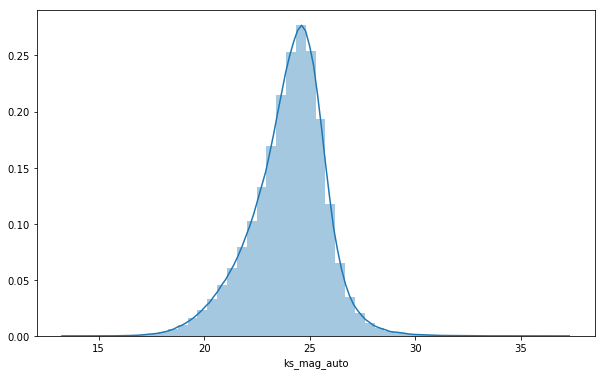

In [26]:
sns.distplot(m_cosmos_ks)

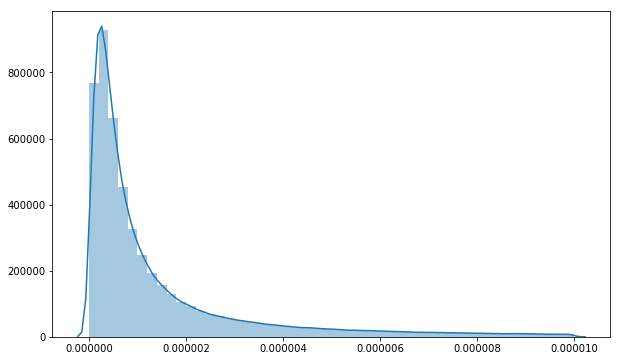

In [37]:
f_cosmos_ks
f_mask = (f_cosmos_ks < 1e-5) #& (f_cosmos_ks > 1e-10) #Seems an ok compromise in terms of removing very long tail
sns.distplot(f_cosmos_ks[f_mask])

## Data model

Glen et al 2010 - source counts P(D)
